In [2]:
import sys
sys.path.append("/Users/samuelhope/opt/anaconda3/lib/python3.8/site-packages")

In [3]:
!pip install opencv-python

In [4]:
# Import opencv
import cv2 

# Import uuid
import uuid

# Import Operating System
import os

# Import time
import time

# Define the labels

In [5]:
labels=["one","two","three","four","five"]
number_imgs=5

# Setup Folders

In [6]:
IMAGES_PATH = os.path.join('Tensorflow', 'workspace', 'images', 'collectedimages')
if not os.path.exists(IMAGES_PATH):
    if os.name == 'posix':
        !mkdir -p {IMAGES_PATH}
    if os.name == 'nt':
         !mkdir {IMAGES_PATH}
for label in labels:
    path = os.path.join(IMAGES_PATH, label)
    if not os.path.exists(path):
        !mkdir {path}

# Capture Images

In [20]:
for label in labels:
    cap = cv2.VideoCapture(0)
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    for imgnum in range(number_imgs):
        print('Collecting image {}'.format(imgnum))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH,label,label+'.'+'{}.jpg'.format(str(uuid.uuid1())))
        cv2.imwrite(imgname, frame)
        cv2.imshow('frame', frame)
        time.sleep(2)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

# Building and Training Model

In [7]:
CUSTOM_MODEL_NAME = 'fingerOD' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = "label_map.pbtxt"

In [8]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [9]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [34]:
#Make directories
for path in paths.values():
    if not os.path.exists(path):
            !mkdir -p {path}

In [38]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9681 sha256=38d64470c927e3d5fd3b3dfa435aafa1de912fed4a213e443da6e3c9352cc03f
  Stored in directory: /Users/samuelhope/Library/Caches/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [45]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 199.0 MB 32 kB/s  eta 0:00:010   |██▏                             | 13.6 MB 2.9 MB/s eta 0:01:04     |██████████████                  | 86.8 MB 3.9 MB/s eta 0:00:29     |█████████████████▍              | 108.3 MB 2.5 MB/s eta 0:00:37eta 0:00:12     |████████████████████▋           | 128.0 MB 6.3 MB/s eta 0:00:12     |█████████████████████▏          | 131.5 MB 3.9 MB/s eta 0:00:18     |██████████████████████▎         | 138.4 MB 3.2 MB/s eta 0:00:19     |███████████████████████▏        | 143.8 MB 3.1 MB/s eta 0:00:18�█▎  | 182.3 MB 2.2 MB/s eta 0:00:08     |█████████████████████████████▋  | 183.9 MB 2.2 MB/s eta 0:00:07     |█████████████████████████████▉  | 185.4 MB 4.3 MB/s eta 0:00:04     |█████████████████████████████▉  | 185.6 MB 4.3 MB/s eta 0:00:04     |█████████████████████████████▉  | 185.8 MB 4.3 MB/s eta 0:00:04
     |████████████████████████████████| 1.3 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 5.2 MB/s eta

    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0


In [35]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 60139, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 60139 (delta 72), reused 103 (delta 37), pack-reused 59992
Receiving objects: 100% (60139/60139), 573.74 MiB | 3.47 MiB/s, done.
Resolving deltas: 100% (41816/41816), done.
Updating files: 100% (2596/2596), done.


In [10]:
#!apt-get install protobuf-compiler
#!brew install protobuf-c
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .

Processing /Users/samuelhope/OneDrive-UniversityofStAndrews/SammyslearningAI/TFODCourse-main/Tensorflow/models/research


  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1661145 sha256=00fa0059208a4d303e8c15222c641c8fa78e2b170c8baea42ba52a0ec653382a
  Stored in directory: /private/var/folders/5h/jfh64sy14s34nq2lstdrfcqw0000gn/T/pip-ephem-wheel-cache-r2vds7ro/wheels/77/94/ec/48ebba544ed68ff7b6a4be39621e6e5e63d9f7ac2aafb581c4
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [11]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}


Running tests under Python 3.8.5: /Users/samuelhope/opt/anaconda3/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-08-15 14:13:13.208285: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/samuelhope/opt/anaconda3/lib/python3.8/site-packages/object_detection/builders/model_builder.py:1088: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0815 14:13:13.623408 4614557120 model_builder.py:1088] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.77s
I0815 14:13:13.966853 4614557120 test_util.py:2188] time

I0815 14:13:20.475889 4614557120 efficientnet_model.py:147] round_filter input=16 output=16
I0815 14:13:20.476068 4614557120 efficientnet_model.py:147] round_filter input=24 output=24
I0815 14:13:20.657359 4614557120 efficientnet_model.py:147] round_filter input=24 output=24
I0815 14:13:20.657564 4614557120 efficientnet_model.py:147] round_filter input=40 output=40
I0815 14:13:20.827043 4614557120 efficientnet_model.py:147] round_filter input=40 output=40
I0815 14:13:20.827267 4614557120 efficientnet_model.py:147] round_filter input=80 output=80
I0815 14:13:21.091722 4614557120 efficientnet_model.py:147] round_filter input=80 output=80
I0815 14:13:21.091888 4614557120 efficientnet_model.py:147] round_filter input=112 output=112
I0815 14:13:21.368910 4614557120 efficientnet_model.py:147] round_filter input=112 output=112
I0815 14:13:21.369081 4614557120 efficientnet_model.py:147] round_filter input=192 output=192
I0815 14:13:22.067703 4614557120 efficientnet_model.py:147] round_filter i

I0815 14:13:27.979131 4614557120 efficientnet_model.py:147] round_filter input=192 output=208
I0815 14:13:27.979466 4614557120 efficientnet_model.py:147] round_filter input=320 output=352
I0815 14:13:28.211478 4614557120 efficientnet_model.py:147] round_filter input=1280 output=1408
I0815 14:13:28.269778 4614557120 efficientnet_model.py:458] Building model efficientnet with params ModelConfig(width_coefficient=1.1, depth_coefficient=1.2, resolution=260, dropout_rate=0.3, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=Fals

I0815 14:13:35.831230 4614557120 ssd_efficientnet_bifpn_feature_extractor.py:142] EfficientDet EfficientNet backbone version: efficientnet-b5
I0815 14:13:35.831397 4614557120 ssd_efficientnet_bifpn_feature_extractor.py:144] EfficientDet BiFPN num filters: 288
I0815 14:13:35.831493 4614557120 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet BiFPN num iterations: 7
I0815 14:13:35.833292 4614557120 efficientnet_model.py:147] round_filter input=32 output=48
I0815 14:13:35.857006 4614557120 efficientnet_model.py:147] round_filter input=32 output=48
I0815 14:13:35.857164 4614557120 efficientnet_model.py:147] round_filter input=16 output=24
I0815 14:13:36.283666 4614557120 efficientnet_model.py:147] round_filter input=16 output=24
I0815 14:13:36.283834 4614557120 efficientnet_model.py:147] round_filter input=24 output=40
I0815 14:13:36.729129 4614557120 efficientnet_model.py:147] round_filter input=24 output=40
I0815 14:13:36.729297 4614557120 efficientnet_model.py:147] round_fil

I0815 14:13:46.892856 4614557120 efficientnet_model.py:147] round_filter input=24 output=48
I0815 14:13:46.893023 4614557120 efficientnet_model.py:147] round_filter input=40 output=80
I0815 14:13:47.525825 4614557120 efficientnet_model.py:147] round_filter input=40 output=80
I0815 14:13:47.526046 4614557120 efficientnet_model.py:147] round_filter input=80 output=160
I0815 14:13:48.792282 4614557120 efficientnet_model.py:147] round_filter input=80 output=160
I0815 14:13:48.792434 4614557120 efficientnet_model.py:147] round_filter input=112 output=224
I0815 14:13:49.794831 4614557120 efficientnet_model.py:147] round_filter input=112 output=224
I0815 14:13:49.795034 4614557120 efficientnet_model.py:147] round_filter input=192 output=384
I0815 14:13:51.725610 4614557120 efficientnet_model.py:147] round_filter input=192 output=384
I0815 14:13:51.725780 4614557120 efficientnet_model.py:147] round_filter input=320 output=640
I0815 14:13:52.455480 4614557120 efficientnet_model.py:147] round_fi

In [78]:
import object_detection
import wget

In [14]:
#!wget {PRETRAINED_MODEL_URL}
wget.download(PRETRAINED_MODEL_URL)
!mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [....................................................] 20515344 / 20515344x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# Create Label map

In [15]:
labels = [{'name':'one', 'id':1}, {'name':'two', 'id':2}, {'name':'three', 'id':3}, {'name':'four', 'id':4},{'name':'five', 'id':5}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# Create TF Records

In [8]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [14]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


In [10]:
#copy model config to training folder
!cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

In [16]:
#update config for transfer learning
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

config

{'model': ssd {
   num_classes: 5
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [17]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)

In [18]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [19]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# Training

In [43]:

!pip install matplotlib_inline

  Using cached matplotlib_inline-0.1.2-py3-none-any.whl (8.2 kB)


In [20]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [21]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [44]:
!{command}

/Users/samuelhope/opt/anaconda3/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.6.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(
2021-08-13 15:59:27.153152: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable t

INFO:tensorflow:Step 100 per-step time 2.216s
I0813 16:03:59.180824 4429036992 model_lib_v2.py:698] Step 100 per-step time 2.216s
INFO:tensorflow:{'Loss/classification_loss': 0.35396963,
 'Loss/localization_loss': 0.20791577,
 'Loss/regularization_loss': 0.15444277,
 'Loss/total_loss': 0.71632814,
 'learning_rate': 0.0319994}
I0813 16:03:59.181472 4429036992 model_lib_v2.py:701] {'Loss/classification_loss': 0.35396963,
 'Loss/localization_loss': 0.20791577,
 'Loss/regularization_loss': 0.15444277,
 'Loss/total_loss': 0.71632814,
 'learning_rate': 0.0319994}
INFO:tensorflow:Step 200 per-step time 1.726s
I0813 16:06:51.770546 4429036992 model_lib_v2.py:698] Step 200 per-step time 1.726s
INFO:tensorflow:{'Loss/classification_loss': 0.3033419,
 'Loss/localization_loss': 0.17795292,
 'Loss/regularization_loss': 0.15421338,
 'Loss/total_loss': 0.6355082,
 'learning_rate': 0.0373328}
I0813 16:06:51.770889 4429036992 model_lib_v2.py:701] {'Loss/classification_loss': 0.3033419,
 'Loss/localizat

INFO:tensorflow:Step 1600 per-step time 1.800s
I0813 16:44:19.105323 4429036992 model_lib_v2.py:698] Step 1600 per-step time 1.800s
INFO:tensorflow:{'Loss/classification_loss': 0.10531252,
 'Loss/localization_loss': 0.03728698,
 'Loss/regularization_loss': 0.14923735,
 'Loss/total_loss': 0.29183686,
 'learning_rate': 0.079970405}
I0813 16:44:19.105663 4429036992 model_lib_v2.py:701] {'Loss/classification_loss': 0.10531252,
 'Loss/localization_loss': 0.03728698,
 'Loss/regularization_loss': 0.14923735,
 'Loss/total_loss': 0.29183686,
 'learning_rate': 0.079970405}
INFO:tensorflow:Step 1700 per-step time 1.873s
I0813 16:47:26.378976 4429036992 model_lib_v2.py:698] Step 1700 per-step time 1.873s
INFO:tensorflow:{'Loss/classification_loss': 0.057624906,
 'Loss/localization_loss': 0.023873612,
 'Loss/regularization_loss': 0.1484572,
 'Loss/total_loss': 0.22995572,
 'learning_rate': 0.07995972}
I0813 16:47:26.379988 4429036992 model_lib_v2.py:701] {'Loss/classification_loss': 0.057624906,
 '

# Evaluation

In [28]:
!pwd

/Users/samuelhope/OneDrive-UniversityofStAndrews/SammyslearningAI/TFODCourse-main


In [22]:

command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT,paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'],paths['CHECKPOINT_PATH'])
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/fingerOD --pipeline_config_path=Tensorflow/workspace/models/fingerOD/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/fingerOD


In [28]:
!command

In [25]:
train_log_path=os.path.join("Tensorflow","workspace","models","fingerOD","train")
train_log_path

'Tensorflow/workspace/models/fingerOD/train'

In [27]:
!tensorboard --logdir=train_log_path


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Traceback (most recent call last):
  File "/Users/samuelhope/opt/anaconda3/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/Users/samuelhope/opt/anaconda3/lib/python3.8/site-packages/tensorboard/main.py", line 46, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/Users/samuelhope/opt/anaconda3/lib/python3.8/site-packages/absl/app.py", line 312, in run
    _run_main(main, args)
  File "/Users/samuelhope/opt/anaconda3/lib/python3.8/site-packages/absl/app.py", line 258, in _run_main
    sys.exit(main(argv))
  File "/Users/samuelhope/opt/anaconda3/lib/python3.8/site-packages/tensorboard/program.py", line 276, in main
    return runner(self.flags) or 0
  File "/Users/samuelhope/opt/anaconda3/lib/python3.8/site-packages/tensorboard/program.py

# Load Train Model From Checkpoint

In [105]:
!pip install tensorflow --upgrade

Requirement already up-to-date: tensorflow in /Users/samuelhope/opt/anaconda3/lib/python3.8/site-packages (2.6.0)


In [106]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.17.3
Uninstalling protobuf-3.17.3:
  Successfully uninstalled protobuf-3.17.3
Found existing installation: matplotlib 3.3.2
Uninstalling matplotlib-3.3.2:
  Successfully uninstalled matplotlib-3.3.2
  Using cached protobuf-3.17.3-cp38-cp38-macosx_10_9_x86_64.whl (1.0 MB)
  Using cached matplotlib-3.2.0-cp38-cp38-macosx_10_9_x86_64.whl (12.4 MB)
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tf-nightly 2.7.0.dev20210806 requires keras-nightly~=2.7.0.dev, but you'll have keras-nightly 2.5.0.dev2021032900 which is incompatible.
tensorflow-metadata 1.2.0 requires absl-py<0.13,>=0.9, but you'll have absl-py 0.13.0 which is incompatible.
apache-beam 2.31.0 requires avro-python3!=1.9.2,<1.10.0,>=1.8.1, but you

In [103]:
!pip install objectdetection

  Using cached objectdetection-0.0.2-py3-none-any.whl (754 kB)


In [101]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [95]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# Test model on an Image

In [31]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [105]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
IMAGE_NAME="five.55fc7aca-fc33-11eb-80bf-3035addefb12.jpg"
IMAGE_PATH=os.path.join("Tensorflow","workspace","images","collectedimages","five",IMAGE_NAME)

In [107]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

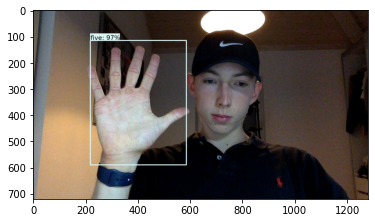

In [108]:
detections = detect_fn(input_tensor)
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# Detection from Webcam

In [109]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# Freeze Graph

In [110]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [111]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [112]:
print(command)

python Tensorflow/models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow/workspace/models/fingerOD/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/fingerOD --output_directory=Tensorflow/workspace/models/fingerOD/export


In [113]:
!{command}

2021-08-15 16:34:07.945260: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0815 16:34:08.307618 4645555648 deprecation.py:611] From /Users/samuelhope/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py:463: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_f

2021-08-15 16:34:47.921581: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
W0815 16:35:10.457615 4645555648 save.py:249] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_fn while saving (showing 5 of 260). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: Tensorflow/workspace/models/fingerOD/export/saved_model/assets
I0815 16:35:17.510773 4645555648 builder_impl.py:780] Assets written to: Tensorflow/workspace/models/fingerOD/export/saved_model/assets
INFO:tensorflow:Writing pipeline config file to Tensorflow/workspace/models/fingerOD/export/pipeline.confi

# Conversion to TFJS

In [114]:
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 1.3 MB/s eta 0:00:01


In [115]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [116]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow/workspace/models/fingerOD/export/saved_model Tensorflow/workspace/models/fingerOD/tfjsexport


In [117]:
!{command}

2021-08-15 16:37:01.259990: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-15 16:37:17.751490: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2021-08-15 16:37:17.752721: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-08-15 16:37:18.244512: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1137] Optimization results for grappler item: graph_to_optimize
  function_optimizer: Graph size after: 3906 nodes (3496), 5221 edges (4804), time = 274.275ms.
  function_optimizer: function_optimizer did nothing. time = 7.638ms.

2021-08-15 16:37:24.569434: I t

# Conversion to TFLite

In [118]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [119]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [120]:
print(command)

python Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow/workspace/models/fingerOD/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/fingerOD --output_directory=Tensorflow/workspace/models/fingerOD/tfliteexport


In [121]:
!{command}

2021-08-15 16:38:59.788771: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0815 16:39:10.934570 4761935296 save_impl.py:71] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7ff70dd5be80>, because it is not built.
W0815 16:39:11.187719 4761935296 save_impl.py:71] Skipping full serialization of Keras layer <keras.layers.convolutional.SeparableConv2D object at 0x7ff70dd94b50>, because it is not built.
W0815 16:39:11.187922 4761935296 save_impl.py:71] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x7ff70e3edc70>, because it is not built.
W0815 16:39:11.188055 4761935296 save_impl.py:71] Ski

2021-08-15 16:39:24.341767: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
W0815 16:39:46.069697 4761935296 save.py:249] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_fn while saving (showing 5 of 260). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: Tensorflow/workspace/models/fingerOD/tfliteexport/saved_model/assets
I0815 16:39:54.991636 4761935296 builder_impl.py:780] Assets written to: Tensorflow/workspace/models/fingerOD/tfliteexport/saved_model/assets


In [122]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [123]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [124]:
!{command}

2021-08-15 16:40:40.304358: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-15 16:40:56.244612: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2021-08-15 16:40:56.244641: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored drop_control_dependency.
2021-08-15 16:40:56.244648: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored change_concat_input_ranges.
2021-08-15 16:40:56.248386: I tensorflow/cc/saved_model/reader.cc:38] Reading SavedModel from: Tensorflow/workspace/models/fingerOD/tfliteexport/saved_model
2021-08-15 16:40:56.389666: I tensorflow/cc/saved_model/reader.cc:90] Reading meta graph with tags { serve

# Zip and Export Models 

In [125]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [128]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'